![JohnSnowLabs](https://nlp.johnsnowlabs.com/assets/images/logo.png)

[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/JohnSnowLabs/nlu/blob/master/examples/colab/Training/multi_lingual/multi_class_text_classification/NLU_training_multi_lingual_multi_class_text_classifier_demo.ipynb)




# Training a Deep Learning Classifier with NLU 
## ClassifierDL (Multi-class Text Classification)
With the [ClassifierDL model](https://nlp.johnsnowlabs.com/docs/en/annotators#classifierdl-multi-class-text-classification) from Spark NLP you can achieve State Of the Art results on any multi class text classification problem 

This notebook showcases the following features : 

- How to train the deep learning classifier
- How to store a pipeline to disk
- How to load the pipeline from disk (Enables NLU offline mode)

You can achieve these results or even better on this dataset with training data :

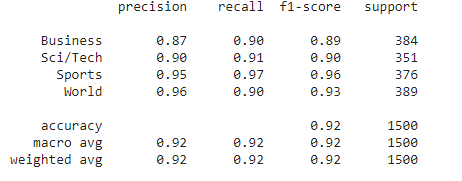

<br>


You can achieve these results or even better on this dataset with test data :

<br>

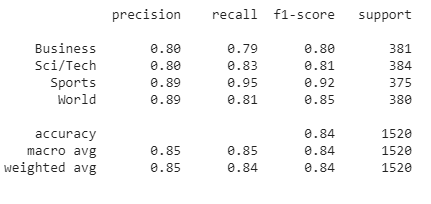

# 1. Install Java 8 and NLU

In [ ]:
!wget https://setup.johnsnowlabs.com/nlu/colab.sh -O - | bash
  

import nlu

--2021-05-05 06:22:01--  https://raw.githubusercontent.com/JohnSnowLabs/nlu/master/scripts/colab_setup.sh
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1671 (1.6K) [text/plain]
Saving to: ‘STDOUT’

-                     0%[                    ]       0  --.-KB/s               Installing  NLU 3.0.0 with  PySpark 3.0.2 and Spark NLP 3.0.1 for Google Colab ...
-                   100%[===================>]   1.63K  --.-KB/s    in 0.001s  

2021-05-05 06:22:02 (1.63 MB/s) - written to stdout [1671/1671]

     |████████████████████████████████| 204.8MB 68kB/s 
     |████████████████████████████████| 153kB 49.5MB/s 
     |████████████████████████████████| 204kB 15.4MB/s 
     |████████████████████████████████| 204kB 54.7MB/s 


# 2. Download news classification dataset

In [ ]:
! wget http://ckl-it.de/wp-content/uploads/2021/02/news_category_test_multi_lingual.csv

--2021-05-05 06:24:07--  http://ckl-it.de/wp-content/uploads/2021/02/news_category_test_multi_lingual.csv
Resolving ckl-it.de (ckl-it.de)... 217.160.0.108, 2001:8d8:100f:f000::209
Connecting to ckl-it.de (ckl-it.de)|217.160.0.108|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1592801 (1.5M) [text/csv]
Saving to: ‘news_category_test_multi_lingual.csv’

news_category_test_ 100%[===================>]   1.52M  1.45MB/s    in 1.0s    

2021-05-05 06:24:08 (1.45 MB/s) - ‘news_category_test_multi_lingual.csv’ saved [1592801/1592801]



In [ ]:
import pandas as pd
test_path = '/content/news_category_test_multi_lingual.csv'
train_df = pd.read_csv(test_path)
from sklearn.model_selection import train_test_split
train_df, test_df = train_test_split(train_df, test_size=0.2)
train_df

,Unnamed: 0,y,text,test_sentences
6171,6171,Sports,"LeBron James scored 25 points, Jeff McInnis a...",
4540,4540,Sports,year old Miss Peru has been crowned Miss World...,
1776,1776,Sports,The message board in Canada #39;s dressing roo...,
7173,7173,Business,Mumbai: Singapore Technologies Telemedia and T...,
6939,6939,Sports,"Syracuse coach Jim Boeheim, while watching tap...",
...,...,...,...,...
2870,2870,Sports,CLEVELAND Indians righthander Kyle Denney was ...,
5610,5610,World,An Italian prosecutor asked a court on Frida...,
6838,6838,Sci/Tech,One of the hottest holiday gifts this year is ...,
2226,2226,World,President Bush went before a skeptical hall of...,


# 3. Train Deep Learning Classifier using nlu.load('train.classifier')

By default, the Universal Sentence Encoder Embeddings (USE) are beeing downloaded to provide embeddings for the classifier. You can use any of the 50+ other sentence Emeddings in NLU tough!

You dataset label column should be named 'y' and the feature column with text data should be named 'text'

In [ ]:
trainable_pipe = nlu.load('xx.embed_sentence.labse train.classifier')
# We need to train longer and user smaller LR for NON-USE based sentence embeddings usually
# We could tune the hyperparameters further with hyperparameter tuning methods like gridsearch
# Also longer training gives more accuracy
trainable_pipe['trainable_classifier_dl'].setMaxEpochs(60)  
trainable_pipe['trainable_classifier_dl'].setLr(0.005) 
fitted_pipe = trainable_pipe.fit(train_df.iloc[:1500])
# predict with the trainable pipeline on dataset and get predictions
preds = fitted_pipe.predict(train_df.iloc[:1500],output_level='document')

#sentence detector that is part of the pipe generates sone NaNs. lets drop them first
preds.dropna(inplace=True)
from sklearn.metrics import classification_report
print(classification_report(preds['y'], preds['classifier_dl']))

preds

labse download started this may take some time.
Approximate size to download 1.7 GB
[OK!]
sentence_detector_dl download started this may take some time.
Approximate size to download 354.6 KB
[OK!]
              precision    recall  f1-score   support

    Business       0.87      0.90      0.89       384
    Sci/Tech       0.90      0.91      0.90       351
      Sports       0.95      0.97      0.96       376
       World       0.96      0.90      0.93       389

    accuracy                           0.92      1500
   macro avg       0.92      0.92      0.92      1500
weighted avg       0.92      0.92      0.92      1500



,y,trained_classifier,test_sentences,text,sentence,origin_index,document,sentence_embedding_labse,Unnamed: 0,trained_classifier_confidence_confidence
0,Sports,Sports,,"LeBron James scored 25 points, Jeff McInnis a...","[LeBron James scored 25 points, Jeff McInnis a...",6171,"LeBron James scored 25 points, Jeff McInnis ad...","[-0.028670351952314377, 0.002140851691365242, ...",6171,1.000000
1,Sports,Sports,,year old Miss Peru has been crowned Miss World...,[year old Miss Peru has been crowned Miss Worl...,4540,year old Miss Peru has been crowned Miss World...,"[0.024964714422822, -0.005680068861693144, 0.0...",4540,0.994070
2,Sports,Sports,,The message board in Canada #39;s dressing roo...,[The message board in Canada #39;s dressing ro...,1776,The message board in Canada #39;s dressing roo...,"[0.036584075540304184, 0.04450026899576187, -0...",1776,1.000000
3,Business,Business,,Mumbai: Singapore Technologies Telemedia and T...,[Mumbai: Singapore Technologies Telemedia and ...,7173,Mumbai: Singapore Technologies Telemedia and T...,"[-0.04297986626625061, -0.0017465378623455763,...",7173,0.986490
4,Sports,Sports,,"Syracuse coach Jim Boeheim, while watching tap...","[Syracuse coach Jim Boeheim, while watching ta...",6939,"Syracuse coach Jim Boeheim, while watching tap...","[-0.020442135632038116, 0.004873048048466444, ...",6939,1.000000
...,...,...,...,...,...,...,...,...,...,...
1495,Sci/Tech,Business,,definition TV yet. Competition may force the p...,"[definition TV yet., Competition may force the...",6539,definition TV yet. Competition may force the p...,"[-0.019764604046940804, 0.004894972778856754, ...",6539,0.994347
1496,Sci/Tech,Sci/Tech,,Webshots users offer their photos of Bill Gate...,[Webshots users offer their photos of Bill Gat...,4257,Webshots users offer their photos of Bill Gate...,"[0.029549693688750267, 0.0014347410760819912, ...",4257,0.998830
1497,Sci/Tech,Sci/Tech,,The two companies say they will jointly develo...,[The two companies say they will jointly devel...,2910,The two companies say they will jointly develo...,"[-0.035613108426332474, -0.029767965897917747,...",2910,1.000000
1498,World,World,,Peruvian authorities on Monday launched an o...,[Peruvian authorities on Monday launched an of...,6626,Peruvian authorities on Monday launched an off...,"[0.030554521828889847, 0.014035936444997787, 0...",6626,1.000000


# 3.1 evaluate on Test Data

In [ ]:
preds = fitted_pipe.predict(test_df,output_level='document')

#sentence detector that is part of the pipe generates sone NaNs. lets drop them first
preds.dropna(inplace=True)
print(classification_report(preds['y'], preds['classifier_dl']))

              precision    recall  f1-score   support

    Business       0.80      0.79      0.80       381
    Sci/Tech       0.80      0.83      0.81       384
      Sports       0.89      0.95      0.92       375
       World       0.89      0.81      0.85       380

    accuracy                           0.84      1520
   macro avg       0.85      0.85      0.84      1520
weighted avg       0.85      0.84      0.84      1520



# 4. Test Model  with  20 languages!

In [ ]:
train_df = pd.read_csv("news_category_test_multi_lingual.csv")
preds = fitted_pipe.predict(train_df[["test_sentences","y"]].iloc[:100],output_level='document')

#sentence detector that is part of the pipe generates sone NaNs. lets drop them first
preds.dropna(inplace=True)
print(classification_report(preds['y'], preds['classifier_dl']))

preds

              precision    recall  f1-score   support

    Business       0.62      0.83      0.71        12
    Sci/Tech       0.91      0.78      0.84        37
      Sports       0.71      0.95      0.82        21
       World       0.88      0.70      0.78        30

    accuracy                           0.80       100
   macro avg       0.78      0.82      0.79       100
weighted avg       0.82      0.80      0.80       100



,sentence,origin_index,y,document,sentence_embedding_labse,trained_classifier,text,trained_classifier_confidence_confidence
0,[టర్నర్ నెవాల్ వద్ద కార్మికులకు ప్రాతినిధ్యం వ...,0,Business,టర్నర్ నెవాల్ వద్ద కార్మికులకు ప్రాతినిధ్యం వహ...,"[-0.05777166411280632, -0.011031205765902996, ...",Business,టర్నర్ నెవాల్ వద్ద కార్మికులకు ప్రాతినిధ్యం వహ...,0.995227
1,"[Торонто, Канада # 36; 10 миллион Ансари X пре...",1,Sci/Tech,"Торонто, Канада # 36; 10 миллион Ансари X прем...","[-0.03927089646458626, -0.059984903782606125, ...",Sports,"Торонто, Канада # 36; 10 миллион Ансари X прем...",0.965024
2,[Une société fondée par un chercheur en chimie...,2,Sci/Tech,Une société fondée par un chercheur en chimie ...,"[-0.04712514951825142, -0.025509435683488846, ...",Sci/Tech,Une société fondée par un chercheur en chimie ...,0.999993
3,[সবেমাত্র ভোর যখন মাইক ফিৎসপ্যাট্রিক রঙিন মানচ...,3,Sci/Tech,সবেমাত্র ভোর যখন মাইক ফিৎসপ্যাট্রিক রঙিন মানচি...,"[-0.046090301126241684, -0.05127095431089401, ...",Sci/Tech,সবেমাত্র ভোর যখন মাইক ফিৎসপ্যাট্রিক রঙিন মানচি...,0.999484
4,[Көньяк Калифорниянең томанга каршы көрәш аген...,4,Sci/Tech,Көньяк Калифорниянең томанга каршы көрәш агент...,"[-0.02939724549651146, -0.04042039066553116, -...",Sci/Tech,Көньяк Калифорниянең томанга каршы көрәш агент...,0.682823
...,...,...,...,...,...,...,...,...
95,[ఫుట్‌బాల్ అసోసియేషన్ ప్రతిష్టను దెబ్బతీసిన కు...,95,Sports,ఫుట్‌బాల్ అసోసియేషన్ ప్రతిష్టను దెబ్బతీసిన కుం...,"[0.025159751996397972, -0.026320766657590866, ...",Sports,ఫుట్‌బాల్ అసోసియేషన్ ప్రతిష్టను దెబ్బతీసిన కుం...,1.000000
96,"[Hücumçu Emile Heskey, Çərşənbə # 39-un Çərşən...",96,Sports,"Hücumçu Emile Heskey, Çərşənbə # 39-un Çərşənb...","[0.04458563029766083, 0.03187406063079834, -0....",Sports,"Hücumçu Emile Heskey, Çərşənbə # 39-un Çərşənb...",1.000000
97,"[Staples Inc. & lt; A HREF = ""http://www., inv...",97,Business,"Staples Inc. & lt; A HREF = ""http://www.invest...","[-0.016342531889677048, -0.004877157974988222,...",Business,"Staples Inc. & lt; A HREF = ""http://www.invest...",1.000000
98,[គណៈប្រតិភូនៃប្រទេសអ៊ីរ៉ាក់ត្រូវបានពន្យារពេលដោ...,98,World,គណៈប្រតិភូនៃប្រទេសអ៊ីរ៉ាក់ត្រូវបានពន្យារពេលដោយ...,"[0.030007336288690567, -0.002715253969654441, ...",World,គណៈប្រតិភូនៃប្រទេសអ៊ីរ៉ាក់ត្រូវបានពន្យារពេលដោយ...,0.999755


# The Model understands Englsih
![en](https://www.worldometers.info/img/flags/small/tn_nz-flag.gif)

In [ ]:
fitted_pipe.predict("There have been a great increase in businesses over the last decade ")


,sentence,origin_index,document,sentence_embedding_labse,trained_classifier,trained_classifier_confidence_confidence
0,[There have been a great increase in businesse...,0,There have been a great increase in businesses...,"[0.012169234454631805, -0.002660348080098629, ...",Business,0.999809


In [ ]:
fitted_pipe.predict("Science has advanced rapidly over the last century ")


,sentence,origin_index,document,sentence_embedding_labse,trained_classifier,trained_classifier_confidence_confidence
0,[Science has advanced rapidly over the last ce...,0,Science has advanced rapidly over the last cen...,"[0.022739632055163383, -0.034671563655138016, ...",Sci/Tech,0.999993


# The Model understands German
![de](https://www.worldometers.info/img/flags/small/tn_gm-flag.gif)

In [ ]:
# German for: 'Businesses are the best way of making profit'
fitted_pipe.predict("Unternehmen sind der beste Weg, um Gewinn zu erzielen")


,sentence,origin_index,document,sentence_embedding_labse,trained_classifier,trained_classifier_confidence_confidence
0,"[Unternehmen sind der beste Weg, um Gewinn zu ...",0,"Unternehmen sind der beste Weg, um Gewinn zu e...","[-0.048822492361068726, -0.007162907160818577,...",Business,0.999662


In [ ]:
# German for: 'Science has advanced rapidly over the last century'
fitted_pipe.predict("Die Wissenschaft hat im letzten Jahrhundert rasante Fortschritte gemacht ")

,sentence,origin_index,document,sentence_embedding_labse,trained_classifier,trained_classifier_confidence_confidence
0,[Die Wissenschaft hat im letzten Jahrhundert r...,0,Die Wissenschaft hat im letzten Jahrhundert ra...,"[0.035708051174879074, -0.04514779895544052, -...",Sci/Tech,0.999872


# The Model understands Chinese
![zh](https://www.worldometers.info/img/flags/small/tn_ch-flag.gif)

In [ ]:
# Chinese for: 'There have been a great increase in businesses over the last decade'
fitted_pipe.predict("在过去的十年中，业务有了很大的增长 ")

,sentence,origin_index,document,sentence_embedding_labse,trained_classifier,trained_classifier_confidence_confidence
0,[在过去的十年中，业务有了很大的增长],0,在过去的十年中，业务有了很大的增长,"[0.0071435291320085526, -0.0031970362178981304...",Business,0.998403


In [ ]:
# Chinese for: 'Science has advanced rapidly over the last century'
fitted_pipe.predict("在上个世纪，科学发展迅速 ")
		

,sentence,origin_index,document,sentence_embedding_labse,trained_classifier,trained_classifier_confidence_confidence
0,[在上个世纪，科学发展迅速],0,在上个世纪，科学发展迅速,"[0.018992088735103607, -0.05363348498940468, -...",Sci/Tech,0.999965


# Model understands Afrikaans

![af](https://www.worldometers.info/img/flags/small/tn_sf-flag.gif)



In [ ]:
#  Afrikaans for: 'There have been a great increase in businesses over the last decade'
fitted_pipe.predict("Daar het die afgelope dekade 'n groot toename in besighede plaasgevind ")

,sentence,origin_index,document,sentence_embedding_labse,trained_classifier,trained_classifier_confidence_confidence
0,[Daar het die afgelope dekade 'n groot toename...,0,Daar het die afgelope dekade 'n groot toename ...,"[0.028091425076127052, -0.01651562750339508, -...",Business,0.999667


In [ ]:
#  Afrikaans for: 'Science has advanced rapidly over the last century'
fitted_pipe.predict("Die wetenskap het die afgelope eeu vinnig gevorder ")

,sentence,origin_index,document,sentence_embedding_labse,trained_classifier,trained_classifier_confidence_confidence
0,[Die wetenskap het die afgelope eeu vinnig gev...,0,Die wetenskap het die afgelope eeu vinnig gevo...,"[0.026470882818102837, -0.04339250922203064, -...",Sci/Tech,0.999957


# The model understands Vietnamese
![vi](https://www.worldometers.info/img/flags/small/tn_vm-flag.gif)

In [ ]:
# Vietnamese for: 'There have been a great increase in businesses over the last decade'
fitted_pipe.predict("Đã có sự gia tăng đáng kể trong các doanh nghiệp trong thập kỷ qua ")

,sentence,origin_index,document,sentence_embedding_labse,trained_classifier,trained_classifier_confidence_confidence
0,[Đã có sự gia tăng đáng kể trong các doanh ngh...,0,Đã có sự gia tăng đáng kể trong các doanh nghi...,"[0.0025938497856259346, -0.03647598996758461, ...",Business,0.990353


In [ ]:
# Vietnamese for: 'Science has advanced rapidly over the last century'
fitted_pipe.predict("Khoa học đã phát triển nhanh chóng trong thế kỷ qua ")

,sentence,origin_index,document,sentence_embedding_labse,trained_classifier,trained_classifier_confidence_confidence
0,[Khoa học đã phát triển nhanh chóng trong thế ...,0,Khoa học đã phát triển nhanh chóng trong thế k...,"[0.006926487199962139, -0.05958796292543411, -...",Sci/Tech,0.999156


# The model understands Japanese
![ja](https://www.worldometers.info/img/flags/small/tn_ja-flag.gif)


In [ ]:
# Japanese for: 'Businesses are the best way of making profit'
fitted_pipe.predict("ビジネスは利益を上げるための最良の方法です")

,sentence,origin_index,document,sentence_embedding_labse,trained_classifier,trained_classifier_confidence_confidence
0,[ビジネスは利益を上げるための最良の方法です],0,ビジネスは利益を上げるための最良の方法です,"[-0.029112379997968674, -0.022607864812016487,...",Business,0.999007


In [ ]:
# Japanese for: 'Science has advanced rapidly over the last century'
fitted_pipe.predict("科学は前世紀にわたって急速に進歩しました ")

,sentence,origin_index,document,sentence_embedding_labse,trained_classifier,trained_classifier_confidence_confidence
0,[科学は前世紀にわたって急速に進歩しました],0,科学は前世紀にわたって急速に進歩しました,"[0.019697299227118492, -0.043922919780015945, ...",Sci/Tech,0.999981


# The model understands Zulu
![zu](https://www.worldometers.info/img/flags/small/tn_sf-flag.gif)

In [ ]:
#  Zulu for: 'There have been a great increase in businesses over the last decade'
fitted_pipe.predict("Kube nokwanda okukhulu emabhizinisini kule minyaka eyishumi edlule ")

,sentence,origin_index,document,sentence_embedding_labse,trained_classifier,trained_classifier_confidence_confidence
0,[Kube nokwanda okukhulu emabhizinisini kule mi...,0,Kube nokwanda okukhulu emabhizinisini kule min...,"[0.011455180123448372, -0.01975909061729908, -...",Business,0.998063


In [ ]:
#  Zulu for: 'Science has advanced rapidly over the last century'
fitted_pipe.predict("Isayensi ithuthuke ngokushesha ngekhulu leminyaka elidlule ")

,sentence,origin_index,document,sentence_embedding_labse,trained_classifier,trained_classifier_confidence_confidence
0,[Isayensi ithuthuke ngokushesha ngekhulu lemin...,0,Isayensi ithuthuke ngokushesha ngekhulu leminy...,"[0.0330704040825367, -0.044426657259464264, -0...",Sci/Tech,0.999993


# The  Model understands Turkish
![tr](https://www.worldometers.info/img/flags/small/tn_tu-flag.gif)

In [ ]:
#  Turkish for: 'Businesses are the best way of making profit'
fitted_pipe.predict("İşletmeler kar elde etmenin en iyi yoludur ")

,sentence,origin_index,document,sentence_embedding_labse,trained_classifier,trained_classifier_confidence_confidence
0,[İşletmeler kar elde etmenin en iyi yoludur],0,İşletmeler kar elde etmenin en iyi yoludur,"[-0.02334517240524292, 0.000546906900126487, -...",World,0.778869


In [ ]:
#  Turkish for: 'Science has advanced rapidly over the last century'
fitted_pipe.predict("Bilim, geçen yüzyılda hızla ilerledi ")

,sentence,origin_index,document,sentence_embedding_labse,trained_classifier,trained_classifier_confidence_confidence
0,"[Bilim, geçen yüzyılda hızla ilerledi]",0,"Bilim, geçen yüzyılda hızla ilerledi","[0.01670285128057003, -0.050043195486068726, -...",Sci/Tech,0.999952


#  The Model understands Hebrew
![he](https://www.worldometers.info/img/flags/small/tn_sf-flag.gif)

In [ ]:
# Hebrew for: 'There have been a great increase in businesses over the last decade'
fitted_pipe.predict("חלה עלייה גדולה בעסקים בעשור האחרון ")

,sentence,origin_index,document,sentence_embedding_labse,trained_classifier,trained_classifier_confidence_confidence
0,[חלה עלייה גדולה בעסקים בעשור האחרון],0,חלה עלייה גדולה בעסקים בעשור האחרון,"[0.03062829189002514, -0.02228061482310295, -0...",Business,0.99995


In [ ]:
# Hebrew for: 'Science has advanced rapidly over the last century'
fitted_pipe.predict("המדע התקדם במהירות במהלך המאה האחרונה ")

,sentence,origin_index,document,sentence_embedding_labse,trained_classifier,trained_classifier_confidence_confidence
0,[המדע התקדם במהירות במהלך המאה האחרונה],0,המדע התקדם במהירות במהלך המאה האחרונה,"[-0.0030932666268199682, -0.05540183186531067,...",Sci/Tech,0.999996


# The Model understands Telugu
![te](https://www.worldometers.info/img/flags/small/tn_in-flag.gif)


In [ ]:
# Telugu for: 'There have been a great increase in businesses over the last decade'
fitted_pipe.predict("గత దశాబ్దంలో వ్యాపారాలలో గొప్ప పెరుగుదల ఉంది ")

,sentence,origin_index,document,sentence_embedding_labse,trained_classifier,trained_classifier_confidence_confidence
0,[గత దశాబ్దంలో వ్యాపారాలలో గొప్ప పెరుగుదల ఉంది],0,గత దశాబ్దంలో వ్యాపారాలలో గొప్ప పెరుగుదల ఉంది,"[0.005267495755106211, -0.022807631641626358, ...",Business,0.999976


In [ ]:
# Telugu for: 'Science has advanced rapidly over the last century'
fitted_pipe.predict("గత శతాబ్దంలో సైన్స్ వేగంగా అభివృద్ధి చెందింది ")


,sentence,origin_index,document,sentence_embedding_labse,trained_classifier,trained_classifier_confidence_confidence
0,[గత శతాబ్దంలో సైన్స్ వేగంగా అభివృద్ధి చెందింది],0,గత శతాబ్దంలో సైన్స్ వేగంగా అభివృద్ధి చెందింది,"[-0.015292854979634285, -0.03326154127717018, ...",Sci/Tech,0.999914


# Model understands Russian
![ru](https://www.worldometers.info/img/flags/small/tn_rs-flag.gif)


In [ ]:
#  Russian for: 'Businesses are the best way of making profit'
fitted_pipe.predict("Бизнес - лучший способ получения прибыли")

,sentence,origin_index,document,sentence_embedding_labse,trained_classifier,trained_classifier_confidence_confidence
0,[Бизнес - лучший способ получения прибыли],0,Бизнес - лучший способ получения прибыли,"[-0.016973992809653282, -0.024397604167461395,...",Business,0.999864


In [ ]:
#  Russian for: 'Science has advanced rapidly over the last century'
fitted_pipe.predict("Наука стремительно развивалась за последнее столетие ")

,sentence,origin_index,document,sentence_embedding_labse,trained_classifier,trained_classifier_confidence_confidence
0,[Наука стремительно развивалась за последнее с...,0,Наука стремительно развивалась за последнее ст...,"[0.013989578001201153, -0.0456346794962883, -0...",Sci/Tech,0.999994


# Model understands Urdu
![ur](https://www.worldometers.info/img/flags/small/tn_pk-flag.gif)

In [ ]:
# Urdu for: 'There have been a great increase in businesses over the last decade'
fitted_pipe.predict("پچھلے ایک دہائی کے دوران کاروباروں میں زبردست اضافہ ہوا ہے ")

,sentence,origin_index,document,sentence_embedding_labse,trained_classifier,trained_classifier_confidence_confidence
0,[پچھلے ایک دہائی کے دوران کاروباروں میں زبردست...,0,پچھلے ایک دہائی کے دوران کاروباروں میں زبردست ...,"[-0.004565518815070391, -0.008193258196115494,...",Business,0.999983


In [ ]:
# Urdu for: 'Science has advanced rapidly over the last century'
fitted_pipe.predict("سائنس گذشتہ صدی کے دوران تیزی سے ترقی کرچکی ہے ")

,sentence,origin_index,document,sentence_embedding_labse,trained_classifier,trained_classifier_confidence_confidence
0,[سائنس گذشتہ صدی کے دوران تیزی سے ترقی کرچکی ہے],0,سائنس گذشتہ صدی کے دوران تیزی سے ترقی کرچکی ہے,"[-0.013339939527213573, -0.026210565119981766,...",Sci/Tech,0.984679


# Model understands Hindi
![hi](https://www.worldometers.info/img/flags/small/tn_in-flag.gif)


In [ ]:
# hindi for: 'There have been a great increase in businesses over the last decade'
fitted_pipe.predict("पिछले दशक में व्यवसायों में बहुत वृद्धि हुई है ")

,sentence,origin_index,document,sentence_embedding_labse,trained_classifier,trained_classifier_confidence_confidence
0,[पिछले दशक में व्यवसायों में बहुत वृद्धि हुई है],0,पिछले दशक में व्यवसायों में बहुत वृद्धि हुई है,"[-0.003939628601074219, -0.029372189193964005,...",Business,0.999962


In [ ]:
		
# hindi for: 'Science has advanced rapidly over the last century'
fitted_pipe.predict("विज्ञान पिछली सदी में तेजी से आगे बढ़ा है ")

,sentence,origin_index,document,sentence_embedding_labse,trained_classifier,trained_classifier_confidence_confidence
0,[विज्ञान पिछली सदी में तेजी से आगे बढ़ा है],0,विज्ञान पिछली सदी में तेजी से आगे बढ़ा है,"[-0.0006327558076009154, -0.04775548726320267,...",Sci/Tech,0.999993


# The model understands Tartar
![tt](https://www.worldometers.info/img/flags/small/tn_rs-flag.gif)

In [ ]:
# Tartar for: 'There have been a great increase in businesses over the last decade'
fitted_pipe.predict("Соңгы ун елда бизнеста зур үсеш булды ")

,sentence,origin_index,document,sentence_embedding_labse,trained_classifier,trained_classifier_confidence_confidence
0,[Соңгы ун елда бизнеста зур үсеш булды],0,Соңгы ун елда бизнеста зур үсеш булды,"[0.023730726912617683, -0.02879853919148445, -...",Business,0.934704


In [ ]:
# Tartar for: 'Science has advanced rapidly over the last century'
fitted_pipe.predict("Соңгы гасырда фән тиз үсә ")

,sentence,origin_index,document,sentence_embedding_labse,trained_classifier,trained_classifier_confidence_confidence
0,[Соңгы гасырда фән тиз үсә],0,Соңгы гасырда фән тиз үсә,"[0.021184425801038742, -0.046850692480802536, ...",Sci/Tech,0.999991


# The Model understands French
![fr](https://www.worldometers.info/img/flags/small/tn_fr-flag.gif)

In [ ]:
# French for: 'There have been a great increase in businesses over the last decade'
fitted_pipe.predict("Il y a eu une forte augmentation des entreprises au cours de la dernière décennie ")

,sentence,origin_index,document,sentence_embedding_labse,trained_classifier,trained_classifier_confidence_confidence
0,[Il y a eu une forte augmentation des entrepri...,0,Il y a eu une forte augmentation des entrepris...,"[0.007794354110956192, -0.012789416126906872, ...",Business,0.999989


In [ ]:
# French for: 'Science has advanced rapidly over the last century'
fitted_pipe.predict("La science a progressé rapidement au cours du siècle dernier ")

,sentence,origin_index,document,sentence_embedding_labse,trained_classifier,trained_classifier_confidence_confidence
0,[La science a progressé rapidement au cours du...,0,La science a progressé rapidement au cours du ...,"[0.012393303215503693, -0.04608025774359703, -...",Sci/Tech,0.999996


# The Model understands Thai
![th](https://www.worldometers.info/img/flags/small/tn_th-flag.gif)

In [ ]:
		
# Thai for: 'There have been a great increase in businesses over the last decade'
fitted_pipe.predict("มีธุรกิจเพิ่มขึ้นอย่างมากในช่วงทศวรรษที่ผ่านมา ")

,sentence,origin_index,document,sentence_embedding_labse,trained_classifier,trained_classifier_confidence_confidence
0,[มีธุรกิจเพิ่มขึ้นอย่างมากในช่วงทศวรรษที่ผ่านมา],0,มีธุรกิจเพิ่มขึ้นอย่างมากในช่วงทศวรรษที่ผ่านมา,"[0.008413499221205711, -0.024852054193615913, ...",Business,0.991779


In [ ]:
# Thai for: 'Science has advanced rapidly over the last century'
fitted_pipe.predict("วิทยาศาสตร์ก้าวหน้าอย่างรวดเร็วในช่วงศตวรรษที่ผ่านมา ")

,sentence,origin_index,document,sentence_embedding_labse,trained_classifier,trained_classifier_confidence_confidence
0,[วิทยาศาสตร์ก้าวหน้าอย่างรวดเร็วในช่วงศตวรรษที...,0,วิทยาศาสตร์ก้าวหน้าอย่างรวดเร็วในช่วงศตวรรษที่...,"[0.007343569304794073, -0.04965794086456299, -...",Sci/Tech,0.999949


# The Model understands Khmer
![km](https://www.worldometers.info/img/flags/small/tn_cb-flag.gif)

In [ ]:
# Khmer for: 'There have been a great increase in businesses over the last decade'
fitted_pipe.predict("មានការរីកចម្រើនយ៉ាងខ្លាំងនៅក្នុងអាជីវកម្មក្នុងរយៈពេលមួយទសវត្សចុងក្រោយនេះ ")

,sentence,origin_index,document,sentence_embedding_labse,trained_classifier,trained_classifier_confidence_confidence
0,[មានការរីកចម្រើនយ៉ាងខ្លាំងនៅក្នុងអាជីវកម្មក្នុ...,0,មានការរីកចម្រើនយ៉ាងខ្លាំងនៅក្នុងអាជីវកម្មក្នុង...,"[0.025004420429468155, -0.037305913865566254, ...",Business,0.967588


In [ ]:
		
# Khmer for: 'Science has advanced rapidly over the last century'
fitted_pipe.predict("វិទ្យាសាស្ត្របានជឿនលឿនយ៉ាងលឿនក្នុងរយៈពេលមួយសតវត្សចុងក្រោយនេះ ")
		

,sentence,origin_index,document,sentence_embedding_labse,trained_classifier,trained_classifier_confidence_confidence
0,[វិទ្យាសាស្ត្របានជឿនលឿនយ៉ាងលឿនក្នុងរយៈពេលមួយសត...,0,វិទ្យាសាស្ត្របានជឿនលឿនយ៉ាងលឿនក្នុងរយៈពេលមួយសតវ...,"[0.00846723560243845, -0.05188147351145744, -0...",Sci/Tech,0.999939


# The Model understands Yiddish
![yi](https://www.worldometers.info/img/flags/small/tn_pl-flag.gif)

In [ ]:

# Yiddish for: 'There have been a great increase in businesses over the last decade'
fitted_pipe.predict("די לעצטע יאָרצענדלינג איז געווען אַ גרויס פאַרגרעסערן אין געשעפטן ")

,sentence,origin_index,document,sentence_embedding_labse,trained_classifier,trained_classifier_confidence_confidence
0,[די לעצטע יאָרצענדלינג איז געווען אַ גרויס פאַ...,0,די לעצטע יאָרצענדלינג איז געווען אַ גרויס פאַר...,"[0.0017608355265110731, -0.03173188120126724, ...",Business,0.999986


In [ ]:
# Yiddish for: 'Science has advanced rapidly over the last century'
fitted_pipe.predict("וויסנשאַפֿט איז ראַפּאַדלי אַוואַנסירטע איבער די לעצטע יאָרהונדערט ")

,sentence,origin_index,document,sentence_embedding_labse,trained_classifier,trained_classifier_confidence_confidence
0,[וויסנשאַפֿט איז ראַפּאַדלי אַוואַנסירטע איבער...,0,וויסנשאַפֿט איז ראַפּאַדלי אַוואַנסירטע איבער ...,"[-0.020669342949986458, -0.055476754903793335,...",Sci/Tech,0.99999


# The Model understands Kygrgyz
![ky](https://www.worldometers.info/img/flags/small/tn_kg-flag.gif)

In [ ]:
# Kygrgyz for: 'Businesses are the best way of making profit'
fitted_pipe.predict("Бизнес - бул киреше табуунун эң мыкты жолу ")
		

,sentence,origin_index,document,sentence_embedding_labse,trained_classifier,trained_classifier_confidence_confidence
0,[Бизнес - бул киреше табуунун эң мыкты жолу],0,Бизнес - бул киреше табуунун эң мыкты жолу,"[-0.02840232476592064, -0.02759084478020668, -...",Business,0.99997


In [ ]:
# Kygrgyz for: 'Science has advanced rapidly over the last century'
fitted_pipe.predict("Илим акыркы кылымда тездик менен өнүккөн ")

,sentence,origin_index,document,sentence_embedding_labse,trained_classifier,trained_classifier_confidence_confidence
0,[Илим акыркы кылымда тездик менен өнүккөн],0,Илим акыркы кылымда тездик менен өнүккөн,"[0.025420306250452995, -0.044107209891080856, ...",Sci/Tech,0.999989


# The Model understands Tamil
![ta](https://www.worldometers.info/img/flags/small/tn_in-flag.gif)

In [ ]:
# Tamil for: 'There have been a great increase in businesses over the last decade'
fitted_pipe.predict("கடந்த தசாப்தத்தில் வணிகங்களில் பெரும் அதிகரிப்பு ஏற்பட்டுள்ளது ")

,sentence,origin_index,document,sentence_embedding_labse,trained_classifier,trained_classifier_confidence_confidence
0,[கடந்த தசாப்தத்தில் வணிகங்களில் பெரும் அதிகரிப...,0,கடந்த தசாப்தத்தில் வணிகங்களில் பெரும் அதிகரிப்...,"[0.00573153980076313, -0.03077314794063568, -0...",Business,0.99997


In [ ]:
		
# Tamil for: 'Science has advanced rapidly over the last century'
fitted_pipe.predict("கடந்த நூற்றாண்டில் அறிவியல் வேகமாக முன்னேறியுள்ளது ")
		

,sentence,origin_index,document,sentence_embedding_labse,trained_classifier,trained_classifier_confidence_confidence
0,[கடந்த நூற்றாண்டில் அறிவியல் வேகமாக முன்னேறியு...,0,கடந்த நூற்றாண்டில் அறிவியல் வேகமாக முன்னேறியுள...,"[0.00972939282655716, -0.04586024209856987, -0...",Sci/Tech,0.999998


# 5. Lets save the model

In [ ]:
stored_model_path = './models/classifier_dl_trained' 
fitted_pipe.save(stored_model_path)

Stored model in ./models/classifier_dl_trained


# 6. Lets load the model from HDD.
This makes Offlien NLU usage possible!   
You need to call nlu.load(path=path_to_the_pipe) to load a model/pipeline from disk.

In [ ]:
stored_model_path = './models/classifier_dl_trained'
hdd_pipe = nlu.load(path=stored_model_path)

preds = hdd_pipe.predict('Tesla plans to invest 10M into the ML sector')
preds

,from_disk,origin_index,sentence_embedding_from_disk,document,from_disk_confidence_confidence,sentence,text
0,[Business],8589934592,"[[0.02070710062980652, -0.031539998948574066, ...",Tesla plans to invest 10M into the ML sector,[0.93137294],[Tesla plans to invest 10M into the ML sector],Tesla plans to invest 10M into the ML sector


In [ ]:
hdd_pipe.print_info()